In [11]:
import pandas as pd
import pickle
import csv

valence vector design 1: empty: -1, positive:2, negative:1, mix:3, neutral:4 
This script computes the transition states of valence vector, then save transition states as a file
The transition states include: 5 self-transition states, the below transition states include both directions:
positive and negative transition states, mix and positive, mix and negative, mix and neutral, neutral and positive, neutral and negative, empty and positive, empty and negative, empty and mix, empty and neutral


In [5]:
# import the object
valencVec = pickle.load( open( "../../data/important_data/moodVectorsData/MoodVecDes1.pickle", "rb" ))

In [6]:
def getTransitions(ValenceObject):
    emptyTran = 0
    negaTran = 0
    posiTran = 0
    mixTran = 0
    neuTran = 0
    PosAndNeg = 0
    MixAndPos = 0
    MixAndNeg = 0
    MixAndNeu = 0    
    NeuAndPos = 0
    NeuAndNeg = 0
    EmptyAndPos = 0
    EmptyAndNeg = 0
    EmptyAndMix = 0
    EmptyAndNeu = 0
    preValence = 0
    for valence in ValenceObject:
    #these are self transition states
        if valence == -1 and preValence == -1:
            emptyTran = emptyTran + 1
        elif valence == 1 and preValence == 1:
            negaTran = negaTran + 1
        elif valence == 2 and preValence == 2:
            posiTran = posiTran + 1
        elif valence == 3 and preValence == 3:
            mixTran = mixTran + 1
        elif valence == 4 and preValence == 4:
            neuTran = neuTran + 1
    #positive and negative transition:
        if (valence == 1 and preValence == 2) or (valence == 2 and preValence == 1) :
            PosAndNeg = PosAndNeg + 1
    #mix and positive transition
        if (valence == 3 and preValence == 2) or (valence == 2 and preValence == 3) :
            MixAndPos = MixAndPos + 1
    #mix and negative transition
        if (valence == 3 and preValence == 1) or (valence == 1 and preValence == 3) :
            MixAndNeg = MixAndNeg + 1
    #mix and neutral transition
        if (valence == 3 and preValence == 4) or (valence == 4 and preValence == 3) :
            MixAndNeu = MixAndNeu + 1
    #neutral and postive transition
        if (valence == 4 and preValence == 2) or (valence == 2 and preValence == 4) :
            NeuAndPos = NeuAndPos + 1
    #neutral and negative transition 
        if (valence == 4 and preValence == 1) or (valence == 1 and preValence == 4) :
            NeuAndNeg = NeuAndNeg + 1
    #Empty and positive transition
        if (valence == -1 and preValence == 2) or (valence == 2 and preValence == -1) :
            EmptyAndPos = EmptyAndPos + 1
    
    #Empty and negative transition
        if (valence == -1 and preValence == 1) or (valence == 1 and preValence == -1) :
            EmptyAndNeg = EmptyAndNeg + 1
    
    #Empty and mix transition
        if (valence == -1 and preValence == 3) or (valence == 3 and preValence == -1) :
            EmptyAndMix = EmptyAndMix + 1
    
    #Empty and neutral transition
        if (valence == 4 and preValence == -1) or (valence == -1 and preValence == 4) :
            EmptyAndNeu = EmptyAndNeu + 1
            
            
        preValence = valence
    return [emptyTran, negaTran, posiTran, mixTran, neuTran, PosAndNeg, MixAndPos, MixAndNeg, MixAndNeu, NeuAndPos, NeuAndNeg, EmptyAndPos, EmptyAndNeg, EmptyAndMix, EmptyAndNeu]


In [7]:
def getUserTransitions(valencVec):
    result = {}
    for item in valencVec:
        result[item] = getTransitions(valencVec[item])
#         print(result)
    return result
        
TransitionStates = getUserTransitions(valencVec)    

In [16]:
#each user has 59 transitions
count = 0
for item in TransitionStates:
    print(TransitionStates[item])
    count = count + 1
    if count == 10:
        break

[17, 2, 6, 0, 0, 6, 0, 0, 0, 2, 0, 14, 10, 0, 2]
[0, 21, 14, 0, 1, 15, 2, 2, 0, 0, 2, 0, 2, 0, 0]
[17, 3, 3, 0, 1, 6, 0, 0, 0, 4, 3, 10, 7, 0, 5]
[9, 0, 4, 0, 0, 7, 1, 0, 0, 1, 1, 23, 6, 3, 4]
[35, 2, 0, 0, 1, 0, 0, 0, 0, 1, 5, 3, 8, 0, 4]
[12, 1, 2, 0, 0, 7, 1, 0, 0, 4, 2, 20, 9, 1, 0]
[27, 0, 2, 0, 0, 3, 1, 1, 0, 0, 0, 11, 6, 2, 6]
[13, 0, 6, 0, 1, 6, 1, 0, 0, 2, 3, 10, 9, 1, 7]
[29, 0, 4, 0, 1, 2, 0, 0, 0, 1, 1, 11, 6, 0, 4]
[13, 6, 0, 0, 0, 3, 0, 0, 0, 4, 4, 14, 9, 0, 6]


In [ ]:
#write result as csv
#header = ['userid','vector']
with open('../../data/important_data/moodVectorsData/valenceTransitions.csv','w') as csv_file:
    writer = csv.writer(csv_file)
   # writer.writerow(i for i in header)
    writer.writerow(TransitionStates.keys())
    for row in zip(*TransitionStates.values()):
        writer.writerow(list(row))

In [52]:
#read csv file 
file = pd.read_csv('../../data/important_data/moodVectorsData/valenceTransitions.csv')
file = file.transpose()
file.columns = ['emptyTran', 'negaTran', 'posiTran', 'mixTran', 'neuTran', 'PosAndNeg', 'MixAndPos', 'MixAndNeg', 'MixAndNeu', 'NeuAndPos', 'NeuAndNeg', 'EmptyAndPos', 'EmptyAndNeg', 'EmptyAndMix', 'EmptyAndNeu']
file[1:5]

,emptyTran,negaTran,posiTran,mixTran,neuTran,PosAndNeg,MixAndPos,MixAndNeg,MixAndNeu,NeuAndPos,NeuAndNeg,EmptyAndPos,EmptyAndNeg,EmptyAndMix,EmptyAndNeu
f8708568eff1535c85247b28dc126f9b,0,21,14,0,1,15,2,2,0,0,2,0,2,0,0
f49956142aab2ad74decfd49a103c2f1,17,3,3,0,1,6,0,0,0,4,3,10,7,0,5
f358b75c71d85c91ec0452c6114e3b15,9,0,4,0,0,7,1,0,0,1,1,23,6,3,4
ec3dc451b8a811f05ace158a0d76e32e,35,2,0,0,1,0,0,0,0,1,5,3,8,0,4


compute transition states probability, since all the participants has 59 transtion states, we compute the pobability by dividing the transition values by 59

In [53]:
# Tranprob = file.apply(lambda x: x/59)
Tranprob = file
Tranprob['userid'] = Tranprob.index
Tranprob[1:5]

,emptyTran,negaTran,posiTran,mixTran,neuTran,PosAndNeg,MixAndPos,MixAndNeg,MixAndNeu,NeuAndPos,NeuAndNeg,EmptyAndPos,EmptyAndNeg,EmptyAndMix,EmptyAndNeu,userid
f8708568eff1535c85247b28dc126f9b,0,21,14,0,1,15,2,2,0,0,2,0,2,0,0,f8708568eff1535c85247b28dc126f9b
f49956142aab2ad74decfd49a103c2f1,17,3,3,0,1,6,0,0,0,4,3,10,7,0,5,f49956142aab2ad74decfd49a103c2f1
f358b75c71d85c91ec0452c6114e3b15,9,0,4,0,0,7,1,0,0,1,1,23,6,3,4,f358b75c71d85c91ec0452c6114e3b15
ec3dc451b8a811f05ace158a0d76e32e,35,2,0,0,1,0,0,0,0,1,5,3,8,0,4,ec3dc451b8a811f05ace158a0d76e32e


In [26]:
#save transition probabilities to csv
Tranprob.to_csv('../../data/important_data/moodVectorsData/TransitionProb.csv')

Here we load the personality, swl and cesd data to see their correlation with the transition states

In [31]:
allData = pd.read_csv('../../data/important_data/user_scale_post_time2.csv')
Var = allData[['userid','ope','con','ext','agr','neu','swl','CESD_sum']]
Var[1:5]

,userid,ope,con,ext,agr,neu,swl,CESD_sum
1,06165dddbf8856657d57d27600c4944c,4.75,3.00,2.74,2.45,3.90,4.0,19
2,07244b3fd4536a8eea069ab02057e220,4.85,3.30,2.58,4.30,2.30,5.8,45
3,0724fe854bd455061ba84efecdeff469,4.80,3.55,3.00,2.95,3.15,6.4,6
4,08074f06d6882e73b4db242b38be237a,3.85,2.90,2.90,2.60,3.26,3.2,12


In [54]:
compare = pd.merge(Tranprob, Var, on ='userid', how = 'left')
compare[1:5]

,emptyTran,negaTran,posiTran,mixTran,neuTran,PosAndNeg,MixAndPos,MixAndNeg,MixAndNeu,NeuAndPos,...,EmptyAndMix,EmptyAndNeu,userid,ope,con,ext,agr,neu,swl,CESD_sum
1,0,21,14,0,1,15,2,2,0,0,...,0,0,f8708568eff1535c85247b28dc126f9b,3.35,3.30,3.0,3.55,1.70,4.6,17
2,17,3,3,0,1,6,0,0,0,4,...,0,5,f49956142aab2ad74decfd49a103c2f1,3.45,3.05,2.4,3.50,3.45,3.2,21
3,9,0,4,0,0,7,1,0,0,1,...,3,4,f358b75c71d85c91ec0452c6114e3b15,3.75,3.75,2.7,4.45,2.90,6.0,26
4,35,2,0,0,1,0,0,0,0,1,...,0,4,ec3dc451b8a811f05ace158a0d76e32e,4.60,2.90,2.5,3.30,2.95,2.6,38


In [57]:
#check if there's any row with incomplete data, no rows
nulls=compare[compare.isnull().any(axis=1)]
nulls

,emptyTran,negaTran,posiTran,mixTran,neuTran,PosAndNeg,MixAndPos,MixAndNeg,MixAndNeu,NeuAndPos,...,EmptyAndMix,EmptyAndNeu,userid,ope,con,ext,agr,neu,swl,CESD_sum


In [60]:
corMatrix = compare.corr()
corMatrix.to_csv('TranscorrelationMatrix.csv')
corMatrix

,emptyTran,negaTran,posiTran,mixTran,neuTran,PosAndNeg,MixAndPos,MixAndNeg,MixAndNeu,NeuAndPos,...,EmptyAndNeg,EmptyAndMix,EmptyAndNeu,ope,con,ext,agr,neu,swl,CESD_sum
emptyTran,1.000000,-0.530801,-0.382467,NaN,0.005230,-0.742457,-0.386506,-0.397668,-0.205645,-0.269004,...,-0.056506,0.140958,0.160577,0.130375,-0.044900,0.034344,0.104997,-0.087779,-0.001060,-0.046804
negaTran,-0.530801,1.000000,0.021071,NaN,-0.136024,0.495826,0.284861,0.356729,-0.031050,-0.111998,...,-0.172079,-0.172091,-0.290242,-0.146268,0.016357,-0.121821,-0.263423,0.167850,-0.105445,0.097224
posiTran,-0.382467,0.021071,1.000000,NaN,0.051066,0.283790,0.351329,0.170141,-0.017744,-0.174398,...,-0.379266,-0.147537,-0.271105,-0.130214,0.037559,0.274275,0.117748,0.015465,0.086243,0.014912
mixTran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neuTran,0.005230,-0.136024,0.051066,NaN,1.000000,-0.190593,-0.092389,-0.031340,0.305277,0.285518,...,-0.132101,-0.230034,0.243708,-0.055052,-0.023328,0.016696,-0.050320,-0.189384,0.303154,-0.191036
PosAndNeg,-0.742457,0.495826,0.283790,NaN,-0.190593,1.000000,0.409923,0.571313,0.134321,-0.024834,...,-0.012293,-0.130224,-0.384366,-0.099550,-0.031023,-0.038203,-0.028922,0.208972,-0.090426,0.095412
MixAndPos,-0.386506,0.284861,0.351329,NaN,-0.092389,0.409923,1.000000,0.499454,0.105738,-0.180020,...,-0.257860,0.134301,-0.142937,-0.022691,0.035966,-0.028432,0.076889,0.068718,0.061412,0.065803
MixAndNeg,-0.397668,0.356729,0.170141,NaN,-0.031340,0.571313,0.499454,1.000000,0.197798,-0.133216,...,-0.199554,-0.061004,-0.212247,-0.019263,-0.047022,-0.126306,-0.012388,0.181164,-0.149221,0.124422
MixAndNeu,-0.205645,-0.031050,-0.017744,NaN,0.305277,0.134321,0.105738,0.197798,1.000000,0.387312,...,-0.163413,-0.138736,0.118190,-0.089172,-0.081125,-0.074192,-0.054454,0.148037,-0.048769,0.010717
NeuAndPos,-0.269004,-0.111998,-0.174398,NaN,0.285518,-0.024834,-0.180020,-0.133216,0.387312,1.000000,...,0.074837,-0.257226,0.382804,0.000006,-0.207170,-0.173488,-0.140382,0.065055,-0.124722,0.027907


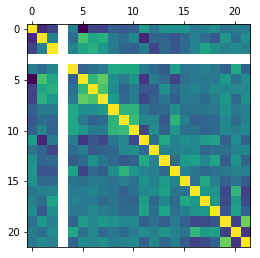

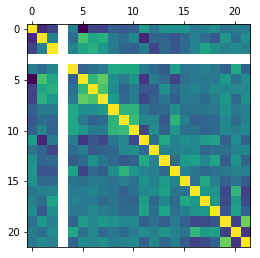

In [50]:
#now we do the correlation matrix
import matplotlib.pyplot as plt
plt.matshow(compare.corr())
plt.show()